# Working with relational data using Pandas
------

### Testing the waters with sample relational data

Based on well defined theory and availability of highly mature, scalable and accessible relational database systems like Postgres, MariaDB and other commercial alternatives, relational data is pervasive in modern software development. Though, off late, the dominance of SQL systems is being challenged by flexibility of some No-SQL datastores, relational data and datastore continue to be an important source of raw datasets for many data analysis projects.

In this part we start-off with a simple relational dataset which will be augmented with more complexity as we proceed through the section. This dataset is then analysed using Pandas - a very nifty python package for working with various kinds of data, especially, tabular and relational data.

#### Why not use one of the many popular datasets

Being able to mentally replicate and cross check the result of an algorithm is pretty important in gaining confidence in data analysis. This is not always possible with, say, the Petals dataset or Reuters dataset for that matter. We therefore construct a small dataset of a nature which could very easily be found in many modern codebases and each time we arrive at a result, we can manually and independently compute the result and compare with that of our approach in code.

In [29]:
import pandas as pd

# Some basic data

c = [
    { 'name': 'John', 'age': 29, 'id': 1 },
    { 'name': 'Doe', 'age': 19, 'id': 2 },
    { 'name': 'Alex', 'age': 32, 'id': 3 },
    { 'name': 'Rahul', 'age': 27, 'id': 4 },
    { 'name': 'Ellen', 'age': 23, 'id': 5},
    { 'name': 'Shristy', 'age': 30, 'id': 6}
]

c

[{'age': 29, 'id': 1, 'name': 'John'},
 {'age': 19, 'id': 2, 'name': 'Doe'},
 {'age': 32, 'id': 3, 'name': 'Alex'},
 {'age': 27, 'id': 4, 'name': 'Rahul'},
 {'age': 23, 'id': 5, 'name': 'Ellen'},
 {'age': 30, 'id': 6, 'name': 'Shristy'}]

In [30]:
# Using the above data as Foreign Key (FK)
t = [
    { 'user_id': 1, 'likes': 'Mango' },
    { 'user_id': 1, 'likes': 'Pepsi' },
    { 'user_id': 2, 'likes': 'Burger' },
    { 'user_id': 2, 'likes': 'Mango' },
    { 'user_id': 3, 'likes': 'Cola' },
    { 'user_id': 4, 'likes': 'Orange' },
    { 'user_id': 3, 'likes': 'Cola' },
    { 'user_id': 2, 'likes': 'Pepsi' },
    { 'user_id': 3, 'likes': 'Carrot' },
    { 'user_id': 4, 'likes': 'Mango' },
    { 'user_id': 6, 'likes': 'Pepsi' },
]

t

[{'likes': 'Mango', 'user_id': 1},
 {'likes': 'Pepsi', 'user_id': 1},
 {'likes': 'Burger', 'user_id': 2},
 {'likes': 'Mango', 'user_id': 2},
 {'likes': 'Cola', 'user_id': 3},
 {'likes': 'Orange', 'user_id': 4},
 {'likes': 'Cola', 'user_id': 3},
 {'likes': 'Pepsi', 'user_id': 2},
 {'likes': 'Carrot', 'user_id': 3},
 {'likes': 'Mango', 'user_id': 4},
 {'likes': 'Pepsi', 'user_id': 6}]

In [31]:
# Create Pandas DataFrame object and set
# appropriate index
df1 = pd.DataFrame(c)
df1.set_index('id')
df1

,age,id,name
0,29,1,John
1,19,2,Doe
2,32,3,Alex
3,27,4,Rahul
4,23,5,Ellen
5,30,6,Shristy


In [32]:
df2 = pd.DataFrame(t)
df2.set_index('user_id')
df2

,likes,user_id
0,Mango,1
1,Pepsi,1
2,Burger,2
3,Mango,2
4,Cola,3
5,Orange,4
6,Cola,3
7,Pepsi,2
8,Carrot,3
9,Mango,4


In [33]:
# Using the FK relation to create a join
pd.merge(df1, df2, left_on='id', right_on='user_id')
m = pd.merge(df1, df2, left_on='id', right_on='user_id')
m.set_index('user_id')
m

,age,id,name,likes,user_id
0,29,1,John,Mango,1
1,29,1,John,Pepsi,1
2,19,2,Doe,Burger,2
3,19,2,Doe,Mango,2
4,19,2,Doe,Pepsi,2
5,32,3,Alex,Cola,3
6,32,3,Alex,Cola,3
7,32,3,Alex,Carrot,3
8,27,4,Rahul,Orange,4
9,27,4,Rahul,Mango,4


In [34]:
# Changing left and right hand side of the relationship
m2 = pd.merge(df2, df1, left_on='user_id', right_on='id')
m2.set_index('user_id')
m2

,likes,user_id,age,id,name
0,Mango,1,29,1,John
1,Pepsi,1,29,1,John
2,Burger,2,19,2,Doe
3,Mango,2,19,2,Doe
4,Pepsi,2,19,2,Doe
5,Cola,3,32,3,Alex
6,Cola,3,32,3,Alex
7,Carrot,3,32,3,Alex
8,Orange,4,27,4,Rahul
9,Mango,4,27,4,Rahul


### Basic Aggregation Operations

In [35]:
# Food wise count of likes
m.groupby('likes')
food_wise = m.groupby('likes')['likes'].count()
food_wise

likes
Burger    1
Carrot    1
Cola      2
Mango     3
Orange    1
Pepsi     3
Name: likes, dtype: int64

In [36]:
# Lets sort our data. Default order is ascending
asc_sort = food_wise.sort_values()
asc_sort

likes
Burger    1
Carrot    1
Orange    1
Cola      2
Mango     3
Pepsi     3
Name: likes, dtype: int64

In [37]:
# An example for descending
dsc_sort = food_wise.sort_values(ascending=False)
dsc_sort

likes
Pepsi     3
Mango     3
Cola      2
Orange    1
Carrot    1
Burger    1
Name: likes, dtype: int64

#### QUICK NOTE ABOUT `sort_values`

By default `sort_values` allocates new memory each time it is called. While working with larger production data we can be limited by the available memory on our machines vis-a-vis the dataset size (and really we do not wish to hit the SWAP partition even on SSDs). In such a situation, we can set the keyword argument `inplace=True`, this will modify the current DataFrame it self instead of allocating new memory.

Beware though mutation, while memory efficient, can be a risky affair leading to complex code paths and hard to reason about code.

In [38]:
# Using in_place sort for memory efficiency
# Notice there is no left hand side value
food_wise.sort_values(ascending=False, inplace=True)

# food_wise itself has changed
food_wise

likes
Pepsi     3
Mango     3
Cola      2
Orange    1
Carrot    1
Burger    1
Name: likes, dtype: int64

### Working with visualisations and charts

We use the python package - matplotlib - to generate visualisations and charts for our analysis. The command `%matplotlib inline` is a handy option which embeds the charts directly into our ipython/jupyter notebook.

While we can directly configure and call matplotlib functions to generate charts. Pandas, via the `DataFrame` object, exposes some very convenient methods to quickly generate plots.

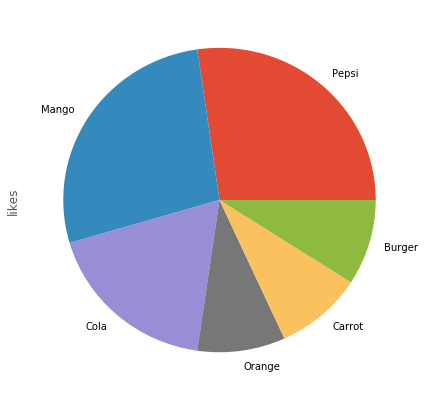

In [39]:
%matplotlib inline
import matplotlib

# ggplot is theme of matplotlib which adds
# some visual asthetics to our charts. It is
# inspired from the eponymous charting package
# of the R programming language
matplotlib.style.use('ggplot')

# Every DataFrame object exposes a plot object
# which can be used to generate different plots

# A pie chart, figsize allows us to define size of the
# plot as a tuple of (width, height) in inches
food_wise.plot.pie(figsize=(7, 7))

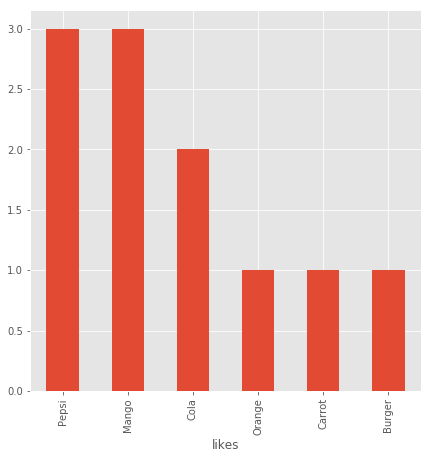

In [40]:
# A bar chart
food_wise.plot.bar(figsize=(7, 7))

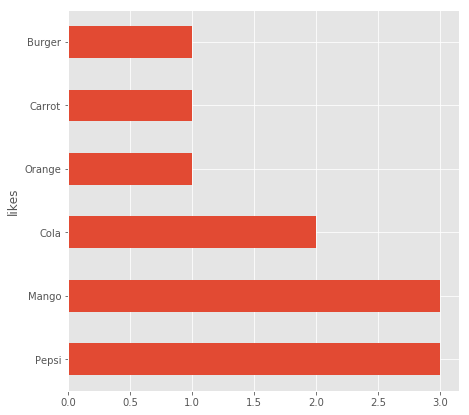

In [41]:
# Horizontal bar chart
food_wise.plot.barh(figsize=(7, 7))

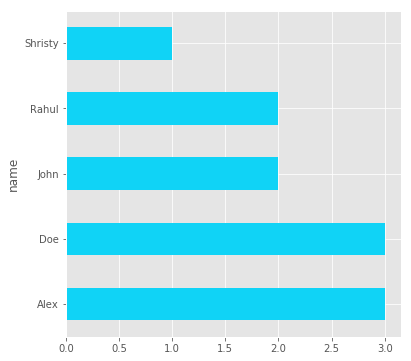

In [42]:
# Lets plot the most active users - those who hit like
# very often using the above techniques

# Get the users by number of likes they have
user_agg = m.groupby('name')['likes'].count()

# Here we go: Our most active users in a different color
user_agg.plot.barh(figsize=(6, 6), color='#10d3f6')

matplotlib does provide many more options to generate complex and we will explore more of them as we proceed.

We assemble data and massage it with the sole purpose seeking insights, getting our questions answered - exactly where pandas shines.

### Asking questions of our data

Pandas supports boolean indexing using the square bracket notation - []. Boolean indexing enables us to pass a predicate which can be used for among other things for filtering. Pandas also provides negation operator `~` to filter based on opposite of our predicate.

In [43]:
# Users who never interact with our data
df1.loc[~df1.id.isin(df2['user_id'])]

,age,id,name
4,23,5,Ellen


Since pandas DataFrame is a column based abstraction (as against row) we need to `reset_index` after an aggregation operation in order retrieve flat DataFrame which is convenient to query.

In [44]:
# Oldest user who has exactly 2 likes
agg_values = (
    m.groupby(['id', 'name', 'age'])
        .count()
        .likes
        .reset_index()
        .sort_values('age', ascending=False)
)

agg_values[agg_values['likes'] == 2].iloc[0].to_frame()

,0
id,1
name,John
age,29
likes,2


In [45]:
# Oldest user who has at least 2 likes
agg_values[agg_values['likes'] >= 2].iloc[0].to_frame()

,2
id,3
name,Alex
age,32
likes,3


In [46]:
# Lets augment our data a little more
users = c + [
    { 'id': 7, 'name': 'Yeti', 'age': 40 },
    { 'id': 8, 'name': 'Commander', 'age': 31 },
    { 'id': 9, 'name': 'Jonnah', 'age': 26 },
    { 'id': 10, 'name': 'Hex', 'age': 28 },
    { 'id': 11, 'name': 'Sam', 'age': 33 },
    { 'id': 12, 'name': 'Madan', 'age': 53 },
    { 'id': 13, 'name': 'Harry', 'age': 38 },
    { 'id': 14, 'name': 'Tom', 'age': 29 },
    { 'id': 15, 'name': 'Daniel', 'age': 23 },
    { 'id': 16, 'name': 'Virat', 'age': 24 },
    { 'id': 17, 'name': 'Nathan', 'age': 16 },
    { 'id': 18, 'name': 'Stepheny', 'age': 26 },
    { 'id': 19, 'name': 'Lola', 'age': 31 },
    { 'id': 20, 'name': 'Amy', 'age': 25 },
]

users, len(users)

([{'age': 29, 'id': 1, 'name': 'John'},
  {'age': 19, 'id': 2, 'name': 'Doe'},
  {'age': 32, 'id': 3, 'name': 'Alex'},
  {'age': 27, 'id': 4, 'name': 'Rahul'},
  {'age': 23, 'id': 5, 'name': 'Ellen'},
  {'age': 30, 'id': 6, 'name': 'Shristy'},
  {'age': 40, 'id': 7, 'name': 'Yeti'},
  {'age': 31, 'id': 8, 'name': 'Commander'},
  {'age': 26, 'id': 9, 'name': 'Jonnah'},
  {'age': 28, 'id': 10, 'name': 'Hex'},
  {'age': 33, 'id': 11, 'name': 'Sam'},
  {'age': 53, 'id': 12, 'name': 'Madan'},
  {'age': 38, 'id': 13, 'name': 'Harry'},
  {'age': 29, 'id': 14, 'name': 'Tom'},
  {'age': 23, 'id': 15, 'name': 'Daniel'},
  {'age': 24, 'id': 16, 'name': 'Virat'},
  {'age': 16, 'id': 17, 'name': 'Nathan'},
  {'age': 26, 'id': 18, 'name': 'Stepheny'},
  {'age': 31, 'id': 19, 'name': 'Lola'},
  {'age': 25, 'id': 20, 'name': 'Amy'}],
 20)

In [47]:
likes = t + [
    { 'user_id': 17, 'likes': 'Mango' },
    { 'user_id': 14, 'likes': 'Orange'},
    { 'user_id': 18, 'likes': 'Burger'},
    { 'user_id': 19, 'likes': 'Blueberry'},
    { 'user_id': 7, 'likes': 'Cola'},
    { 'user_id': 11, 'likes': 'Burger'},
    { 'user_id': 13, 'likes': 'Mango'},
    { 'user_id': 1, 'likes': 'Coconut'},
    { 'user_id': 6, 'likes': 'Pepsi'},
    { 'user_id': 8, 'likes': 'Cola'},
    { 'user_id': 17, 'likes': 'Mango'},
    { 'user_id': 19, 'likes': 'Coconut'},
    { 'user_id': 15, 'likes': 'Blueberry'},
    { 'user_id': 20, 'likes': 'Soda'},
    { 'user_id': 3, 'likes': 'Cola'},
    { 'user_id': 4, 'likes': 'Pepsi'},
    { 'user_id': 14, 'likes': 'Coconut'},
    { 'user_id': 11, 'likes': 'Mango'},
    { 'user_id': 12, 'likes': 'Soda'},
    { 'user_id': 16, 'likes': 'Orange'},
    { 'user_id': 2, 'likes': 'Pepsi'},
    { 'user_id': 19, 'likes': 'Cola'},
    { 'user_id': 15, 'likes': 'Carrot'},
    { 'user_id': 18, 'likes': 'Carrot'},
    { 'user_id': 14, 'likes': 'Soda'},
    { 'user_id': 13, 'likes': 'Cola'},
    { 'user_id': 9, 'likes': 'Pepsi'},
    { 'user_id': 10, 'likes': 'Blueberry'},
    { 'user_id': 7, 'likes': 'Soda'},
    { 'user_id': 12, 'likes': 'Burger'},
    { 'user_id': 6, 'likes': 'Cola'},
    { 'user_id': 4, 'likes': 'Burger'},
    { 'user_id': 14, 'likes': 'Orange'},
    { 'user_id': 18, 'likes': 'Blueberry'},
    { 'user_id': 20, 'likes': 'Cola'},
    { 'user_id': 9, 'likes': 'Soda'},
    { 'user_id': 14, 'likes': 'Pepsi'},
    { 'user_id': 6, 'likes': 'Mango'},
    { 'user_id': 3, 'likes': 'Coconut'},
]

likes, len(likes)

([{'likes': 'Mango', 'user_id': 1},
  {'likes': 'Pepsi', 'user_id': 1},
  {'likes': 'Burger', 'user_id': 2},
  {'likes': 'Mango', 'user_id': 2},
  {'likes': 'Cola', 'user_id': 3},
  {'likes': 'Orange', 'user_id': 4},
  {'likes': 'Cola', 'user_id': 3},
  {'likes': 'Pepsi', 'user_id': 2},
  {'likes': 'Carrot', 'user_id': 3},
  {'likes': 'Mango', 'user_id': 4},
  {'likes': 'Pepsi', 'user_id': 6},
  {'likes': 'Mango', 'user_id': 17},
  {'likes': 'Orange', 'user_id': 14},
  {'likes': 'Burger', 'user_id': 18},
  {'likes': 'Blueberry', 'user_id': 19},
  {'likes': 'Cola', 'user_id': 7},
  {'likes': 'Burger', 'user_id': 11},
  {'likes': 'Mango', 'user_id': 13},
  {'likes': 'Coconut', 'user_id': 1},
  {'likes': 'Pepsi', 'user_id': 6},
  {'likes': 'Cola', 'user_id': 8},
  {'likes': 'Mango', 'user_id': 17},
  {'likes': 'Coconut', 'user_id': 19},
  {'likes': 'Blueberry', 'user_id': 15},
  {'likes': 'Soda', 'user_id': 20},
  {'likes': 'Cola', 'user_id': 3},
  {'likes': 'Pepsi', 'user_id': 4},
  {'li

### Eating your own dog food

The above data has been copy-pasted and hand edited. A problem with this approach is the possibility of data containing more than one like for the same product by the same user. While we can manually check the data the approach will be tedious and untractable as the size of the data increases. Instead we employ pandas itself to indentify duplicate likes by the same person and fix the data accordingly.

In [48]:
# DataFrames from native python dictionaries
df_users = pd.DataFrame(users)
df_likes = pd.DataFrame(likes)

# A user-likes wise group tells you the story
merge = pd.merge(df_users, df_likes, left_on='id', right_on='user_id')
merge.set_index('id')

# We aggregate the likes column and rename it to `Records`
user_likes_group = merge.groupby(['id', 'name', 'likes']).likes.agg(['count']).rename({ 'count': 'Records' })
user_likes_group

count
id name      likes           
1  John      Coconut        1
             Mango          1
             Pepsi          1
2  Doe       Burger         1
             Mango          1
             Pepsi          2
3  Alex      Carrot         1
             Coconut        1
             Cola           3
4  Rahul     Burger         1
             Mango          1
             Orange         1
             Pepsi          1
6  Shristy   Cola           1
             Mango          1
             Pepsi          2
7  Yeti      Cola           1
             Soda           1
8  Commander Cola           1
9  Jonnah    Pepsi          1
             Soda           1
10 Hex       Blueberry      1
11 Sam       Burger         1
             Mango          1
12 Madan     Burger         1
             Soda           1
13 Harry     Cola           1
             Mango          1
14 Tom       Coconut        1
             Orange         2
             Pepsi          1
             Soda           1
15 Daniel    Blueberry      1
             Carrot         1
16 Virat     Orange         1
17 Nathan    Mango          2
18 Stepheny  Blueberry      1
             Burger         1
             Carrot         1
19 Lola      Blueberry      1
             Coconut        1
             Cola           1
20 Amy       Cola           1
             Soda           1

Look at the first two rows in the third columns, the renaming has created a hierarchial index.
Let us flatten the index

In [49]:
# Reset the index to generate a completely flat table
user_likes_group.reset_index()

,id,name,likes,count
0,1,John,Coconut,1
1,1,John,Mango,1
2,1,John,Pepsi,1
3,2,Doe,Burger,1
4,2,Doe,Mango,1
5,2,Doe,Pepsi,2
6,3,Alex,Carrot,1
7,3,Alex,Coconut,1
8,3,Alex,Cola,3
9,4,Rahul,Burger,1


Even after flattening the index, there is too much "noise" in the above data. We do not care about when a user likes a product which dominates this list. Also the data tells us nothing about the rows we need to edit. It tells us that Nathan likes Mango is recorded twice but does not tell us which rows to edit to rectify the same.

In [50]:
# Let us first remove records representing singlular likes
user_likes_group[user_likes_group['count'] > 1].reset_index()

,id,name,likes,count
0,2,Doe,Pepsi,2
1,3,Alex,Cola,3
2,6,Shristy,Pepsi,2
3,14,Tom,Orange,2
4,17,Nathan,Mango,2


So there are in all 6 duplicate records. Doe-Pepsi is recorded twice so that is 1 extra, 2 extra for Alex-Cola and 1 extra for rest of the three pairs, which equals, 1 + 2 + 1 + 1 + 1 = 6.

In [51]:
# Now remove the duplicates
df_unq_likes = df_likes.drop_duplicates()

# The difference should be 6 since 6 records should be eliminated
len(df_unq_likes), len(df_likes)

(44, 50)

We replay our previous aggregation to verify no more duplicates indeed exist.

In [52]:
# Join the datasets
merge = pd.merge(df_users, df_unq_likes, left_on='id', right_on='user_id')
merge.set_index('id')

# We aggregate the likes column and rename it to `Records`
unq_user_likes_group = merge.groupby(['id', 'name', 'likes']).likes.agg(['count']).rename(columns={ 'count': 'Records' })

# Reset the index to generate a completely flat table
unq_user_likes_group.reset_index()

# Should return empty if duplicates are removed
unq_user_likes_group[unq_user_likes_group['Records'] > 1].reset_index()

,id,name,likes,Records


Lets continue with asking more questions of our data and gloss over some more convenience methods exposed by Pandas for aggregation.

In [53]:
# What percent of audience likes Mango?
mango_like_count = merge[merge['likes'] == 'Mango'].groupby(['likes'])['user_id'].count().to_frame()
percent = float(mango_like_count['user_id'] / len(df_users))

df_mango_like = pd.DataFrame([ ['Likes', percent], ['Do not like', 1-percent] ], index=['Status', 'Percent'])
# df_mango_like.plot.pie(subplots=True)
df_mango_like

,0,1
Status,Likes,0.35
Percent,Do not like,0.65
